# Data Preparation for ML projects

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from databricks.sdk.runtime import *
from databricks.connect import DatabricksSession

spark = DatabricksSession.builder.profile("dbrx_connect").getOrCreate()

/Users/ryan/Developer/e2e_mlops_aws/.venv/lib/python3.11/site-packages/databricks/connect/session.py:433: UserWarning: Ignoring the default notebook Spark session and creating a new Spark Connect session. To use the default notebook Spark session, use DatabricksSession.builder.getOrCreate() with no additional parameters.
  warnings.warn(new_notebook_session_msg)


In [13]:
dataset_path = "/Volumes/dt_analytics/analytics_volumes/rhammang/telco"
schema_string = """
    customerID string,
    gender string,
    SeniorCitizen double,
    Partner string,
    Dependents string,
    tenure double,
    phoneService string,
    MultipleLines string,
    internetService string,
    OnlineSecurity string,
    OnlineBackup string,
    DeviceProtection string,
    TechSupport string,
    StreamingTV string,
    StreamingMovies string,
    Contract string,
    PaperlessBilling string,
    PaymentMethod string,
    MonthlyCharges double,
    TotalCharges double,
    Churn string
"""

telco_df = spark.read.csv(dataset_path,
                          header=True,
                          schema=schema_string,
                          multiLine=True,
                          escape='"')

telco_df.show(n=8, truncate=False)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+-------------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|phoneService|MultipleLines   |internetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract      |PaperlessBilling|PaymentMethod            |MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+-------------------------+--------------+------------+-----+
|7590-VHVEG|Female|0.0          |Yes    |No        |1.0   |No          |No phone service|DSL            |No            |Yes         |No              |N

In [14]:
telco_df.summary().show(truncate=False)

+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+-------------------------+------------------+------------------+-----+
|summary|customerID|gender|SeniorCitizen     |Partner|Dependents|tenure            |phoneService|MultipleLines|internetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract      |PaperlessBilling|PaymentMethod            |MonthlyCharges    |TotalCharges      |Churn|
+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+-------------------------+------------------+------------------+-----+
|count  |7043      |7043  |7043              |7043   |7

In [15]:
d = dbutils.fs.ls('/')
# dbutils.data.summarize(telco_df)

In [16]:
telco_pdf = telco_df.toPandas()
telco_pdf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,phoneService,MultipleLines,internetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


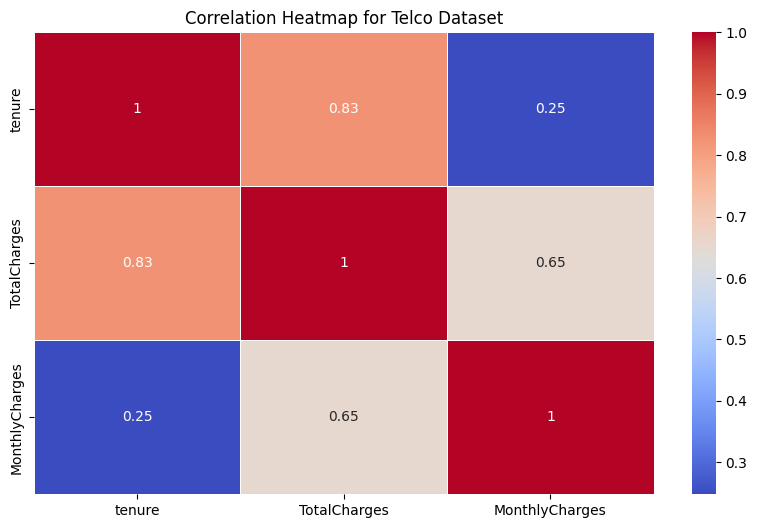

In [17]:
# Select columns that are the numerical columns
selected_columns = ['tenure', 'TotalCharges', 'MonthlyCharges']

# Select the specified columns from the DataFrame
telco_corr = telco_pdf[selected_columns].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(telco_corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Telco Dataset')
plt.show()

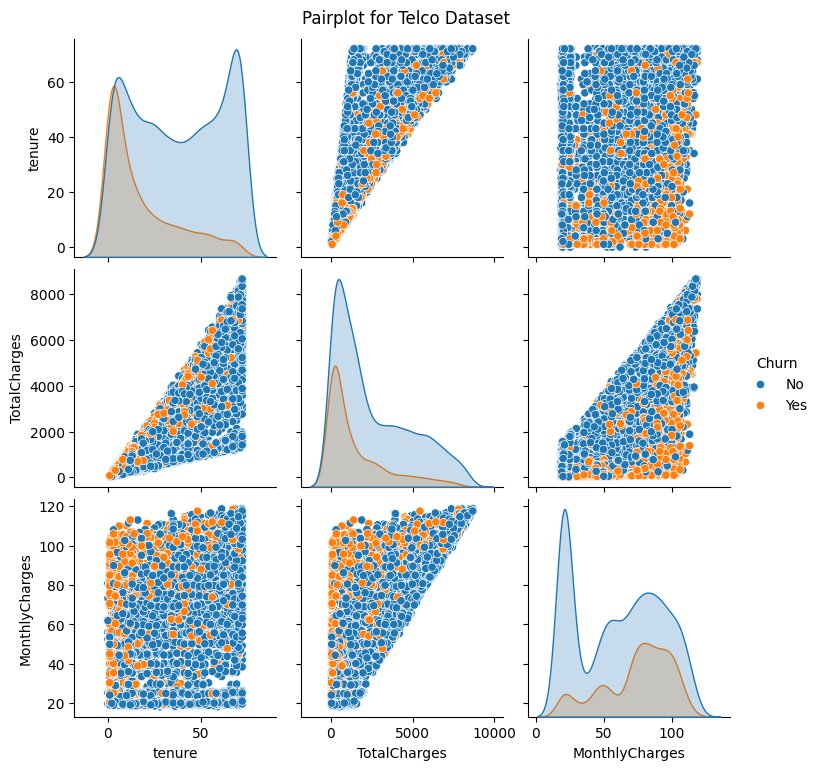

In [18]:
# Select columns that are the numerical columns
selected_columns = ['tenure', 'TotalCharges', 'MonthlyCharges']

# Select the specified columns from the DataFrame
telco_ppdf = telco_pdf[selected_columns + ['Churn']]

# Pairplot for a quick overview of relationships between numerical variables
sns.pairplot(telco_ppdf, hue='Churn', diag_kind='kde')
plt.suptitle('Pairplot for Telco Dataset', y=1.02)
plt.show()

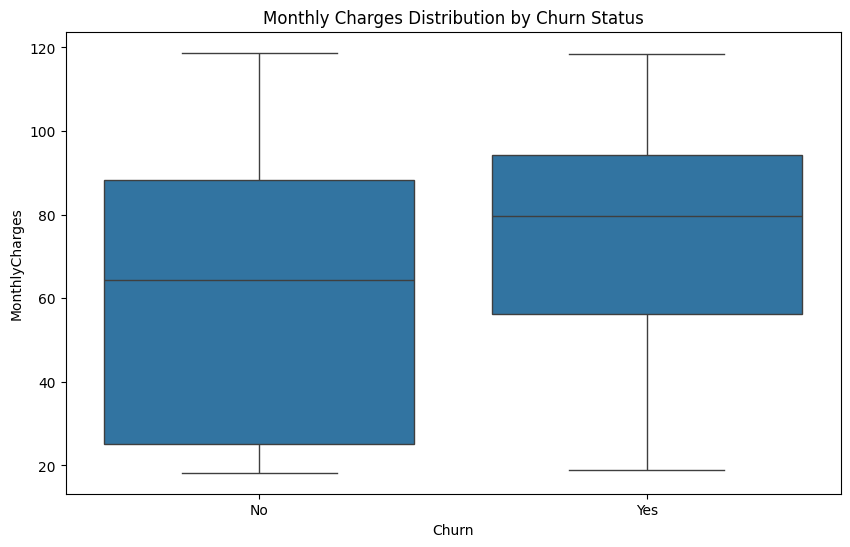

In [19]:
# Boxplot for visualizing the distribution of Monthly Charges by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=telco_pdf)
plt.title('Monthly Charges Distribution by Churn Status')
plt.show()

In [20]:
telco_df.groupBy("PaymentMethod").count().orderBy("count", ascending=False).show(n=8, truncate=False)

+-------------------------+-----+
|PaymentMethod            |count|
+-------------------------+-----+
|Electronic check         |2365 |
|Mailed check             |1612 |
|Bank transfer (automatic)|1544 |
|Credit card (automatic)  |1522 |
+-------------------------+-----+



In [21]:
catalog_name = "admin_integration_testing"
schema_name = "app_telco_churn"
table_name_bronze = "telco_missing_bronze"
bronze_table = catalog_name + "." + schema_name + "." + table_name_bronze 
telco_df.write.saveAsTable(bronze_table) # will be stored under default catalog and schema

AnalysisException: [TABLE_OR_VIEW_ALREADY_EXISTS] Cannot create table or view `app_telco_churn`.`telco_missing_bronze` because it already exists.
Choose a different name, drop the existing object, add the IF NOT EXISTS clause to tolerate pre-existing objects, add the OR REPLACE clause to replace the existing materialized view, or add the OR REFRESH clause to refresh the existing streaming table. SQLSTATE: 42P07

In [ ]:
# Drop columns and overwrite table
to_drop_wrong = ["gender", "SeniorCitizen"]
telco_dropped_df = telco_df.drop(*to_drop_wrong)

telco_dropped_df.write.mode("overwrite").option("overwriteSchema", True).saveAsTable(bronze_table)

In [ ]:
sql_text = "DESCRIBE HISTORY telco_missing_bronze"
spark.sql(sql_text).show()

In [ ]:
spark.table(bronze_table).printSchema()

In [ ]:
sql_text = "DESCRIBE telco_missing_bronze"
spark.sql(sql_text).show()

In [ ]:
telco_df_v0 = (
  spark.read
      .option("versionAsOf", 0)
      .table(table_name_bronze)
)

telco_df_v0.printSchema()

In [ ]:
# Reverting Changes by Timestamp
# Extract timestamp of first version (can also be set manually)
# TODO I think there is a time-zone problem here
timestamp_v0 = spark.sql(f"DESCRIBE HISTORY telco_missing_bronze").orderBy("version").first().timestamp
print(timestamp_v0)

timestamp_v0 = "2024-07-27 18:51:59"
print(timestamp_v0)



In [ ]:
(spark
        .read
        .option("timestampAsOf", timestamp_v0)
        .table("telco_missing_bronze")
        .printSchema()
)

In [ ]:
to_drop = ['']
telco_dropped_df = telco_df_v0.drop(*to_drop)

telco_dropped_df.write.mode("overwrite").option("overwriteSchema", True).saveAsTable(bronze_table)

In [ ]:
sql_text = "DESCRIBE HISTORY `telco_missing_bronze`;"
spark.sql(sql_text).show()